/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.3206 - val_loss: 0.1197
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.1101 - val_loss: 0.0919
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0911 - val_loss: 0.0847
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0845 - val_loss: 0.0810
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0810 - val_loss: 0.0781
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0788 - val_loss: 0.0769
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0771 - val_loss: 0.0761
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0759 - val_loss: 0.0748
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0751 - val_loss: 0.0743
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0741 - val_loss: 0.0731
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1121 - val_loss: 0.0823
Ep

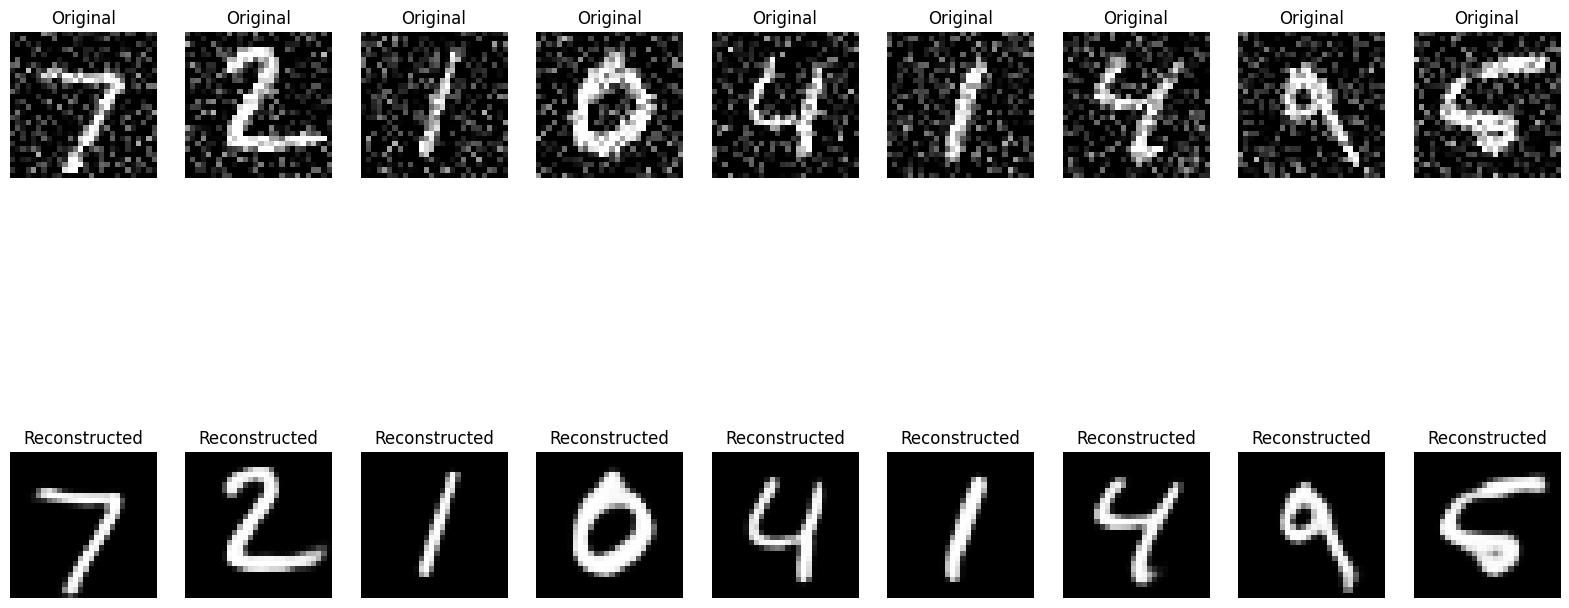

In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape input data
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the autoencoder
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape((7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Ensure the values are still between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

# Compile the autoencoder
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

# Generate reconstructed images using the decoder
reconstructed_images = model.predict(x_test)

# Import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 9, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 9, i+10)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()